In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
# from: https://github.com/PyImageSearch/imutils/blob/master/imutils/convenience.py
def resize(image, width=None, height=None, inter=cv2.INTER_AREA):
    # initialize the dimensions of the image to be resized and
    # grab the image size
    dim = None
    (h, w) = image.shape[:2]

    # if both the width and height are None, then return the
    # original image
    if width is None and height is None:
        return image

    # check to see if the width is None
    if width is None:
        # calculate the ratio of the height and construct the
        # dimensions
        r = height / float(h)
        dim = (int(w * r), height)

    # otherwise, the height is None
    else:
        # calculate the ratio of the width and construct the
        # dimensions
        r = width / float(w)
        dim = (width, int(h * r))

    # resize the image
    resized = cv2.resize(image, dim, interpolation=inter)

    # return the resized image
    return resized

In [3]:
# Load the image
img_template = cv2.imread("../dataset/benchmark/1101102001002_002_p1.jpg")
img_query = cv2.imread("../dataset/samples/1101062028003_003_p1.jpg")

In [4]:
# resize the images
img_template = resize(img_template, width=1000)
img_query = resize(img_query, width=1000)

# convert the images to grayscale
img_template_gray = cv2.cvtColor(img_template, cv2.COLOR_BGR2GRAY)
img_query_gray = cv2.cvtColor(img_query, cv2.COLOR_BGR2GRAY)

In [5]:
orb = cv2.ORB_create()

# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img_template_gray, None)
kp2, des2 = orb.detectAndCompute(img_query_gray, None)

In [6]:
# BFMatcher with default params
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key = lambda x:x.distance)

# pick the matches with distance less than 64
good_matches = [m.distance < 64 for m in matches]

In [28]:
print("Good matches:", sum(good_matches))
print("Similarity:", sum(good_matches) / len(matches))

Good matches: 83
Similarity: 0.5684931506849316


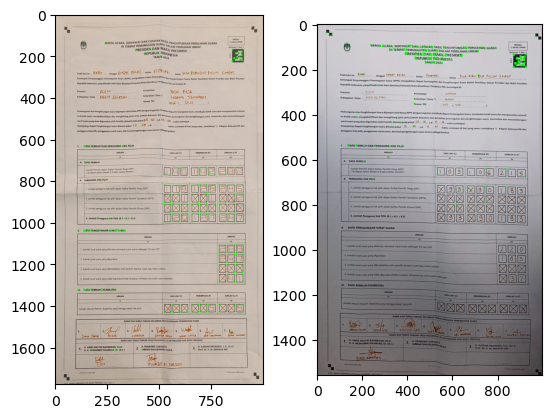

In [29]:
img_template_kp = cv2.drawKeypoints(img_template, kp1, None, color=(0, 255, 0), flags=0)
img_query_kp = cv2.drawKeypoints(img_query, kp2, None, color=(0, 255, 0), flags=0)

fig, ax = plt.subplots(1, 2)
ax[0].imshow(img_template_kp)
ax[1].imshow(img_query_kp)
plt.show()

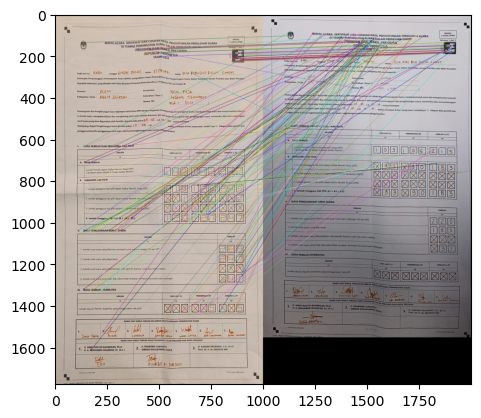

In [30]:
img_matching = cv2.drawMatches(img_template, kp1, img_query, kp2, matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img_matching)
plt.show()